# Лабораторна робота #1

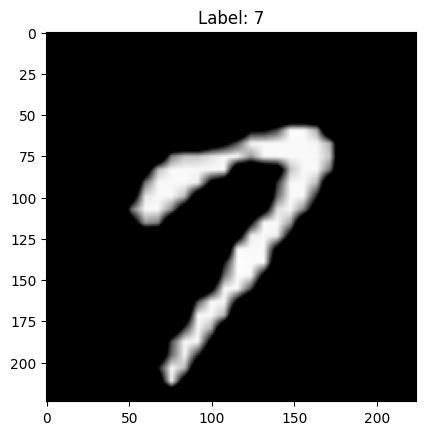

In [1]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

generator = torch.Generator().manual_seed(5921)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([ 
    transforms.Resize(224),
    transforms.Grayscale(num_output_channels=3),  # convert to 3-channel
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # img = (img - mean / std)
])

dataset = datasets.MNIST('mnist_data', train=True, download=True, transform=transform)
img, lbl = dataset[15]

# rearrange from CxHxW to HxWxC && set value between 0 and 1
img = img.permute(1, 2, 0).clamp(0,1)

plt.imshow(img)
plt.title(f"Label: {lbl}")
plt.show()


In [36]:
training_set, validation_set, testing_set = data.random_split(dataset, [0.8, 0.1, 0.1], generator)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

model = models.alexnet(weights=None)
model.classifier[6] = nn.Linear(4096, 10)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) #learning rate

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

print("Training Complete!")

model.eval() 
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print(f'Accuracy of the model on the 10000 test images: {correct / total:.2%}')


Epoch [1/10], Step [100/938], Loss: 0.5658
Epoch [1/10], Step [200/938], Loss: 0.1291
Epoch [1/10], Step [300/938], Loss: 0.0876
Epoch [1/10], Step [400/938], Loss: 0.2147
Epoch [1/10], Step [500/938], Loss: 0.3018
Epoch [1/10], Step [600/938], Loss: 0.0288
Epoch [1/10], Step [700/938], Loss: 0.0128
Epoch [1/10], Step [800/938], Loss: 0.1617


KeyboardInterrupt: 